<a href="https://colab.research.google.com/github/divyanshu3234/gan_model_test/blob/main/gan_diffusion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GANs** and Diffusion Models are premier, yet distinct, generative AI techniques. GANs use a, generator and discriminator network to create, high-fidelity, high-speed images, but face training instability and mode collapse. Diffusion models generate, high-quality images via iterative denoising, offering better diversity and stability but with significantly slower, computation-intensive inference.

In [1]:
!pip install pytorch

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss function of a GAN model
**J
G**
​
 =−
m
1
​
 Σ
i=1
m
​
 logD(G(z
i
​
 ))

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
# data loader and CIFAr10
train_dataset = datasets.CIFAR10(root='./data',\
              train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(train_dataset, \
                                batch_size=32, shuffle=True)

100%|██████████| 170M/170M [00:03<00:00, 46.0MB/s]


In [5]:
# Defining GAN Hyperparameters
latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 10

In [6]:
# building the generator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128 * 8 * 8),
            nn.ReLU(),
            nn.Unflatten(1, (128, 8, 8)),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.78),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img

In [7]:
# building the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
        nn.ZeroPad2d((0, 1, 0, 1)),
        nn.BatchNorm2d(64, momentum=0.82),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(128, momentum=0.82),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256, momentum=0.8),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Flatten(),
        nn.Linear(256 * 5 * 5, 1),
        nn.Sigmoid()
    )

    def forward(self, img):
        validity = self.model(img)
        return validity

In [8]:
# initialising the GAN
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

adversarial_loss = nn.BCELoss()

optimizer_G = optim.Adam(generator.parameters()\
                         , lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters()\
                         , lr=lr, betas=(beta1, beta2))

**Training the GAN**

Train the discriminator on real and fake images, then update the generator to improve its fake image quality. Track losses and visualize generated images after each epoch.

valid = torch.ones(real_images.size(0), 1, device=device): Create a tensor of ones representing real labels for the discriminator.

fake = torch.zeros(real_images.size(0), 1, device=device): Create a tensor of zeros representing fake labels for the discriminator.

z = torch.randn(real_images.size(0), latent_dim, device=device):

Generate random noise vectors as input for the generator.

g_loss = adversarial_loss(discriminator(gen_images), valid): Calculate generator loss based on the discriminator classifying fake images as real.

grid = torchvision.utils.make_grid(generated, nrow=4, normalize=True): Arrange generated images into a grid for display, normalizing pixel values.

Epoch [1/10]                        Batch 100/1563 Discriminator Loss: 0.6117 Generator Loss: 1.1148
Epoch [1/10]                        Batch 200/1563 Discriminator Loss: 0.5485 Generator Loss: 1.0932
Epoch [1/10]                        Batch 300/1563 Discriminator Loss: 0.7554 Generator Loss: 0.7451
Epoch [1/10]                        Batch 400/1563 Discriminator Loss: 0.5629 Generator Loss: 1.1400
Epoch [1/10]                        Batch 500/1563 Discriminator Loss: 0.6908 Generator Loss: 0.7542
Epoch [1/10]                        Batch 600/1563 Discriminator Loss: 0.5410 Generator Loss: 1.0260
Epoch [1/10]                        Batch 700/1563 Discriminator Loss: 0.5623 Generator Loss: 1.0137
Epoch [1/10]                        Batch 800/1563 Discriminator Loss: 0.6900 Generator Loss: 0.8332
Epoch [1/10]                        Batch 900/1563 Discriminator Loss: 0.6038 Generator Loss: 0.9836
Epoch [1/10]                        Batch 1000/1563 Discriminator Loss: 0.6909 Generator Lo

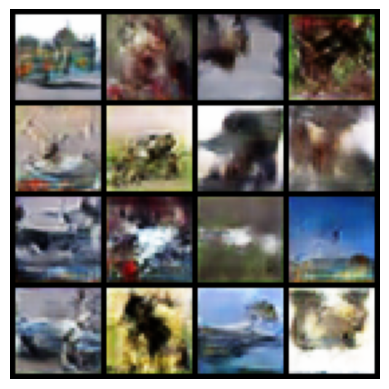

In [9]:
for epoch in range(num_epochs):
    for i, batch in enumerate(dataloader):

        real_images = batch[0].to(device)

        valid = torch.ones(real_images.size(0), 1, device=device)
        fake = torch.zeros(real_images.size(0), 1, device=device)

        real_images = real_images.to(device)

        optimizer_D.zero_grad()

        z = torch.randn(real_images.size(0), latent_dim, device=device)

        fake_images = generator(z)

        real_loss = adversarial_loss(discriminator\
                                     (real_images), valid)
        fake_loss = adversarial_loss(discriminator\
                                     (fake_images.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizer_D.step()

        optimizer_G.zero_grad()

        gen_images = generator(z)

        g_loss = adversarial_loss(discriminator(gen_images), valid)
        g_loss.backward()
        optimizer_G.step()

        if (i + 1) % 100 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}]\
                        Batch {i+1}/{len(dataloader)} "
                f"Discriminator Loss: {d_loss.item():.4f} "
                f"Generator Loss: {g_loss.item():.4f}"
            )
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(16, latent_dim, device=device)
            generated = generator(z).detach().cpu()
            grid = torchvision.utils.make_grid(generated,\
                                        nrow=4, normalize=True)
            plt.imshow(np.transpose(grid, (1, 2, 0)))
            plt.axis("off")
            plt.show()